## MASTER DATA SCIENCE: NUCLIO
### PROFESOR: JOSEPH GALLART
### PROJECT TRENMAX 1/2
### Silvia, Wesley, Daniela

In [ ]:
#IMPORTAMOS LAS LIBRERÍAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [ ]:
#LEEMOS EL FICHERO DE RENFE
df_renfe= pd.read_csv('dataset/renfe.csv')

In [ ]:
df_renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [ ]:
df_renfe.shape

(383568, 9)

### PREGUNTA 1
##### Hola Juan, soy Pedro! un gusto tenerte por aquí, menos mal que te hemos fichado, así podemos sacar este tema tan importante adelante!, ¿Ya has importado el fichero verdad? ¡Vamos a hacer un análisis de ello!, lo primero hay que ver si tenemos nulos, ¿Me puedes decir todas las variables que tenemos nulos?

R: Tenemos nulos en las varibles categóricas 'TIPO_TREN', 'TIPO_TARIFA' y 'CLASE' y en la variable numérica 'PRECIO'

In [ ]:
df_renfe.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN         38357
TIPO_TARIFA       39559
CLASE             39568
PRECIO            28530
dtype: int64

### PREGUNTA 2
##### Vamos a hacer un .info() a la estructura de dataset, ¿Te has dado cuenta que las columnas fechas podemos convertirlas a date? para hacerlo puedes usar el comando pd.to_datetime(df[i])

R: Resuelto. Con el siguiente código se ha cambiado el Dtype de object a datatime:

for i in (df_renfe.loc[:, ['FECHA_CONSULTA','FECHA_INICIO','FECHA_FIN']]):
    df_renfe[i]= pd.to_datetime(df_renfe[i])

In [ ]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       345211 non-null  object 
 6   TIPO_TARIFA     344009 non-null  object 
 7   CLASE           344000 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


In [ ]:
for i in (df_renfe.loc[:, ['FECHA_CONSULTA','FECHA_INICIO','FECHA_FIN']]):
    df_renfe[i]= pd.to_datetime(df_renfe[i])

In [ ]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  383568 non-null  datetime64[ns]
 1   FECHA_INICIO    383568 non-null  datetime64[ns]
 2   FECHA_FIN       383568 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN   383568 non-null  object        
 4   CIUDAD_DESTINO  383568 non-null  object        
 5   TIPO_TREN       345211 non-null  object        
 6   TIPO_TARIFA     344009 non-null  object        
 7   CLASE           344000 non-null  object        
 8   PRECIO          355038 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 26.3+ MB


### PREGUNTA 3
##### ¿Hay duplicados? ¿En caso haya cuántos son? (borrarlo en caso existan)

R: Sí, hay 24 valores duplicados que se han eliminado.

In [ ]:
df_renfe[df_renfe.duplicated(keep='first')].shape

(24, 9)

In [ ]:
#En vez de hacer 'df_renfe_sin_duplicados=df_renfe.drop_duplicates()' hice una copia porque sino cuando avanzaba me aparecía
#un warning todo el tiempo que estaba trabajando en un df modificado y no se qué supongo que es por el python aca en visual
df_renfe2=df_renfe.copy()

In [ ]:
df_renfe2.drop_duplicates(inplace=True)

In [ ]:
df_renfe2[df_renfe2.duplicated(keep='first')]
#len(df_renfe) - len(df_renfe2)

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO


In [ ]:
df_renfe_sin_duplicados= df_renfe2.copy()

### PREGUNTA 4
##### ¡Juan! se me ocurre crear dos variables que serán super interesantes y probablemente importantes para el modelo: a) Tiempo_Viaje: variable que me indica en minutos la duración del viaje. b) Dif_Ini_Bus: variable que me indica en minutos la diferencia entre la fecha de inicio de viaje y la fecha de búsqueda, ¿Lo puedes hacer?  seguro que sí! te doy unas pistas: puedo restar las fechas sin problemas ya que ahora son dates! y si quiero convertirlo en minutos, podrías dividirlo por una función como esta np.timedelta64(1,'m'), buena suerte! :)

R: Resuelto, se han creado dos nuevas variables: 'TIEMPO_VIAJE' y 'DIF_INI_BUS'

df_renfe_sin_duplicados['TIEMPO_VIAJE'] = (df_renfe_sin_duplicados['FECHA_FIN'] - df_renfe_sin_duplicados['FECHA_INICIO'])/np.timedelta64(1,'m')

df_renfe_sin_duplicados['DIF_INI_BUS']=(df_renfe_sin_duplicados['FECHA_INICIO'] - df_renfe_sin_duplicados['FECHA_CONSULTA'])/np.timedelta64(1,'m')

In [ ]:
df_renfe_sin_duplicados['TIEMPO_VIAJE'] = (df_renfe_sin_duplicados['FECHA_FIN'] - df_renfe_sin_duplicados['FECHA_INICIO'])/np.timedelta64(1,'m')

In [ ]:
df_renfe_sin_duplicados['DIF_INI_BUS']=(df_renfe_sin_duplicados['FECHA_INICIO'] - df_renfe_sin_duplicados['FECHA_CONSULTA'])/np.timedelta64(1,'m')

In [ ]:
df_renfe_sin_duplicados.head()
#df_renfe_sin_duplicados.shape

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333


### PREGUNTA 5
##### ¡Qué bien han quedado esas variables! y me parece que podemos hacer "algo más" con las fechas, te comparto este código (el código está justo debajo) y dime qué es lo que está haciendo.

R: El código divide las columnas de formato DATE en diferentes unidades de tiempo (Y/M/D..). Luego de crear nuevas columnas con las unidades de tiempo hora, nombredia, dia y mes elimina las columnas originales de 'FECHA_CONSULTA', 'FECHA INICIO' y 'FECHA_FIN'

In [ ]:
for col in ['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN']:
    df_renfe_sin_duplicados[col + '_HORA'] = df_renfe_sin_duplicados[col].dt.hour
    df_renfe_sin_duplicados[col + '_NOMBREDIA'] = df_renfe_sin_duplicados[col].dt.day_name()
    ##O .dt.weekday_name
    df_renfe_sin_duplicados[col + '_DIA'] = df_renfe_sin_duplicados[col].dt.day
    df_renfe_sin_duplicados[col + '_MES'] = df_renfe_sin_duplicados[col].dt.month

    del df_renfe_sin_duplicados[col]

df_renfe_sin_duplicados.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,1,Saturday,25,5,20,Friday,28,6,23,Friday,28,6
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,13,Saturday,22,6,10,Sunday,14,7,13,Sunday,14,7
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,6,Wednesday,17,4,13,Thursday,23,5,16,Thursday,23,5
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,21,Friday,10,5,14,Wednesday,29,5,22,Wednesday,29,5
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,19,Thursday,9,5,13,Wednesday,26,6,16,Wednesday,26,6


### PREGUNTA 6
##### En el precio existen nulos, ¿Qué porcentaje representa del total del dataset?

R: La cantidad de nulos en la variable precio representa el 7.4 % del total del dataset

In [ ]:
(df_renfe_sin_duplicados['PRECIO'].isnull().sum()) * 100 / len(df_renfe_sin_duplicados)

7.434870575475044

### PREGUNTA 7
##### Vamos a analizar los nulos de cada columna, explícame qué harías con cada columna nula, recuerda que en el peor de los casos la borramos!

R: Primero hemos identificado el porcentaje de nulos de las columnas categoricas. Nos ha salido en los tres casos alrededor de 10%, que consinderamos que es un porcentaje significativamente alto como para borrar las columnas. Por lo tanto, hemos decidido reemplazar los valores nulos por 'Sin información'.

Hemos borrado 534 filas que tenían las tres columnas (TIPO_TREN, TIPO_TARIFA y CLASE) con valores nulos ('Sin información').

Para la columna PRECIO, primero hemos calculado el porcentaje de nulos, el cuál corresponde al 7.4% del total.
Nuestra primera idea como solución ha sido rellenar los valores nulos con la media.
Sin embargo, nos hemos dado cuenta que al ser el Precio la variable dependiente, no era buena idea rellenar los datos nulos con datos ficticios.
Es por eso que creemos que la mejor solución para los valores nulos de la columna PRECIO sería borrarlos.

In [ ]:
df_renfe_sin_duplicados.isnull().sum()

CIUDAD_ORIGEN                   0
CIUDAD_DESTINO                  0
TIPO_TREN                   38357
TIPO_TARIFA                 39554
CLASE                       39563
PRECIO                      28516
TIEMPO_VIAJE                    0
DIF_INI_BUS                     0
FECHA_CONSULTA_HORA             0
FECHA_CONSULTA_NOMBREDIA        0
FECHA_CONSULTA_DIA              0
FECHA_CONSULTA_MES              0
FECHA_INICIO_HORA               0
FECHA_INICIO_NOMBREDIA          0
FECHA_INICIO_DIA                0
FECHA_INICIO_MES                0
FECHA_FIN_HORA                  0
FECHA_FIN_NOMBREDIA             0
FECHA_FIN_DIA                   0
FECHA_FIN_MES                   0
dtype: int64

Primero analizamos las columnas categóricas con nulos ('TIPO_TREN','TIPO_TARIFA','CLASE')

In [ ]:
(df_renfe_sin_duplicados['TIPO_TREN'].isnull().sum() * 100)/len(df_renfe_sin_duplicados)

10.00067788832572

In [ ]:
(df_renfe_sin_duplicados['TIPO_TARIFA'].isnull().sum() * 100)/len(df_renfe_sin_duplicados)

10.3127672444361

In [ ]:
(df_renfe_sin_duplicados['CLASE'].isnull().sum() * 100)/len(df_renfe_sin_duplicados)

10.31511378094821

In [ ]:
df_renfe_sin_duplicados["TIPO_TREN"].unique()

array(['ALVIA', 'AVE', 'REGIONAL', 'AVE-TGV', 'R. EXPRES', 'LD',
       'INTERCITY', 'TRENHOTEL', 'MD-LD', nan, 'AV City', 'MD-AVE',
       'LD-MD', 'AVE-LD', 'AVE-MD', 'LD-AVE', 'MD'], dtype=object)

In [ ]:
df_renfe_sin_duplicados["TIPO_TREN"].fillna('sin informacion', inplace=True)

In [ ]:
df_renfe_sin_duplicados["TIPO_TREN"].unique()

array(['ALVIA', 'AVE', 'REGIONAL', 'AVE-TGV', 'R. EXPRES', 'LD',
       'INTERCITY', 'TRENHOTEL', 'MD-LD', 'sin informacion', 'AV City',
       'MD-AVE', 'LD-MD', 'AVE-LD', 'AVE-MD', 'LD-AVE', 'MD'],
      dtype=object)

In [ ]:
df_renfe_sin_duplicados["TIPO_TARIFA"].fillna('sin informacion', inplace=True)

In [ ]:
df_renfe_sin_duplicados["TIPO_TARIFA"].unique()

array(['Flexible', 'Promo', 'Adulto ida', 'sin informacion', 'Promo +',
       'COD.PROMOCIONAL', 'Mesa', 'Individual-Flexible', '4x100',
       'Grupos Ida', 'Doble Familiar-Flexible'], dtype=object)

In [ ]:
df_renfe_sin_duplicados["CLASE"].fillna('sin informacion', inplace=True)

In [ ]:
df_renfe_sin_duplicados["CLASE"].unique()

array(['Turista', 'Preferente', 'sin informacion', 'Turista con enlace',
       'Turista Plus', 'TuristaSólo plaza H', 'PreferenteSólo plaza H',
       'Cama Turista', 'Cama G. Clase', 'Turista PlusSólo plaza H'],
      dtype=object)

In [ ]:
df_renfe_sin_duplicados.isnull().sum()

CIUDAD_ORIGEN                   0
CIUDAD_DESTINO                  0
TIPO_TREN                       0
TIPO_TARIFA                     0
CLASE                           0
PRECIO                      28516
TIEMPO_VIAJE                    0
DIF_INI_BUS                     0
FECHA_CONSULTA_HORA             0
FECHA_CONSULTA_NOMBREDIA        0
FECHA_CONSULTA_DIA              0
FECHA_CONSULTA_MES              0
FECHA_INICIO_HORA               0
FECHA_INICIO_NOMBREDIA          0
FECHA_INICIO_DIA                0
FECHA_INICIO_MES                0
FECHA_FIN_HORA                  0
FECHA_FIN_NOMBREDIA             0
FECHA_FIN_DIA                   0
FECHA_FIN_MES                   0
dtype: int64

In [ ]:
df_renfe_sin_duplicados2=df_renfe_sin_duplicados.copy()

In [ ]:
#Aquí eliminamos aquellas columnas en que las variables 'TIPO_TARIFA','TIPO_TREN' y 'CLASE' sean 'sin información'
df_renfe_sin_duplicados2.drop(df_renfe_sin_duplicados2[(df_renfe_sin_duplicados2['TIPO_TARIFA']=='sin informacion')&(df_renfe_sin_duplicados2['TIPO_TREN']=='sin informacion')&(df_renfe_sin_duplicados2['CLASE']=='sin informacion')].index,inplace=True)

In [ ]:
len(df_renfe_sin_duplicados)-len(df_renfe_sin_duplicados2)

534

Ahora analizamos la variable dependiente 'PRECIO'. Ya sabemos que los nulos equivalen al 7.4%

In [ ]:
df_renfe_sin_duplicados2['PRECIO'].isnull().sum()

28337

In [ ]:
df_renfe_sin_duplicados2.dropna(subset=['PRECIO'],inplace=True)

In [ ]:
df_renfe_sin_duplicados2.isnull().sum()

CIUDAD_ORIGEN               0
CIUDAD_DESTINO              0
TIPO_TREN                   0
TIPO_TARIFA                 0
CLASE                       0
PRECIO                      0
TIEMPO_VIAJE                0
DIF_INI_BUS                 0
FECHA_CONSULTA_HORA         0
FECHA_CONSULTA_NOMBREDIA    0
FECHA_CONSULTA_DIA          0
FECHA_CONSULTA_MES          0
FECHA_INICIO_HORA           0
FECHA_INICIO_NOMBREDIA      0
FECHA_INICIO_DIA            0
FECHA_INICIO_MES            0
FECHA_FIN_HORA              0
FECHA_FIN_NOMBREDIA         0
FECHA_FIN_DIA               0
FECHA_FIN_MES               0
dtype: int64

In [ ]:
df_renfe_sin_duplicados2.shape

(354673, 20)

In [ ]:
df_renfe_sin_duplicados3=df_renfe_sin_duplicados2.copy()

### PREGUNTA 8
##### Perfecto ya no tenemos los nulos (espero!), como bien sabes nulos no significa que el resto de variables estén bien, vamos a analizarlas con un "value_counts" o con un "hist" cada una de ellas según sean numéricas o string (con un "for" iría mejor), ¿Ves alguna variable que hay que limpiarla?¿Qué haya outlier?¿Qué haya datos que no tienen sentido a nivel de negocio? realizar un mini resumen variable a variable si ves algo raro con ellas, si no ves nada raro no hace falta ponerlo en este resumen, cuando hayas terminado el proceso de limpieza crea una copia del dataset con el nombre de "df_renfe_clean"

R: Para ahorrarnos tiempo hemos hecho una función que clasifica las variables en númericas y en categóricas. Cuando las variables son númericas, la función nos imprime histogramas. Cuando las variables son categóricas, la función nos imprime los valores de un value.counts().

VARIABLES NUMÉRICAS

- DIF_INI_BUS: Hemos borrado 513 registros que tenían valores menores a 0. Ya que los valores negativos no hacen sentido.

- FECHA_FIN_HORA: Decidimos borrar 7346 registros que consideramos outlier que equivalen al 2% del total y que corresponden a los registros entre 0 y 5.

VARIABLES CATEGÓRICAS

- TIPO_TREN: Hemos podido observar que en la columna TIPO_TREN habían 3 valores que tenían nombres distintos aunque se referían a lo mismo. Por ejemlplo:

        LD-MD y MD-LD

        AVE-MD y MD-AVE

        LD-AVE y AVE-LD

Por eso, hemos decidido renombrar uno de los dos valores para así agruparlos.

- TIPO_TARIFA: Hemos agrupado las variables que consideramos que tienen muy pocos valores ('COD.PROMOCIONAL', 'Individual-Flexible', 'Mesa', '4x100', 'Grupos Ida') en otra variable llamada 'otras promociones'.

In [ ]:
target = ['PRECIO']
def obtener_lista_variables(dataset):
    lista_num = []
    lista_cat = []

    for i in dataset:
        if (dataset[i].dtype.kind=='i' or dataset[i].dtype.kind=='f') and i not in target:
            lista_num.append(i)
        elif (dataset[i].dtype.kind=='O') and i not in target:
            lista_cat.append(i)
    return lista_num, lista_cat

In [ ]:
lnum,lcat = obtener_lista_variables(df_renfe_sin_duplicados3)

In [ ]:
len(lnum) + len(lcat)

19

ANÁLISIS VARIABLES NUMÉRICAS:

In [ ]:
lnum

['TIEMPO_VIAJE',
 'DIF_INI_BUS',
 'FECHA_CONSULTA_HORA',
 'FECHA_CONSULTA_DIA',
 'FECHA_CONSULTA_MES',
 'FECHA_INICIO_HORA',
 'FECHA_INICIO_DIA',
 'FECHA_INICIO_MES',
 'FECHA_FIN_HORA',
 'FECHA_FIN_DIA',
 'FECHA_FIN_MES']

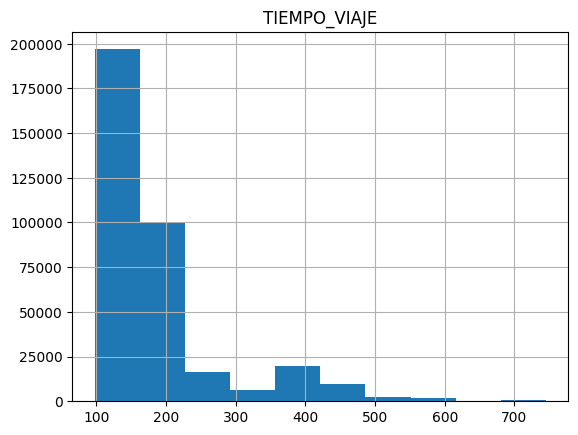

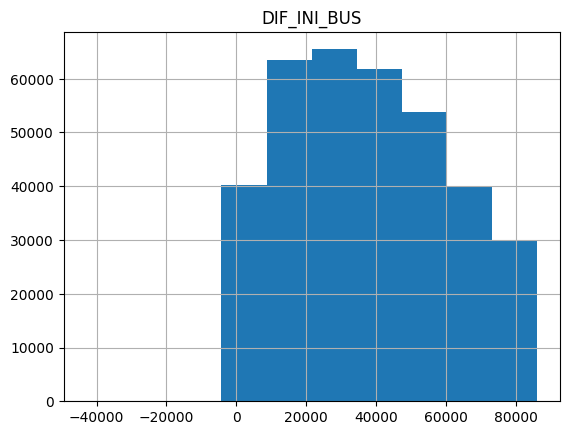

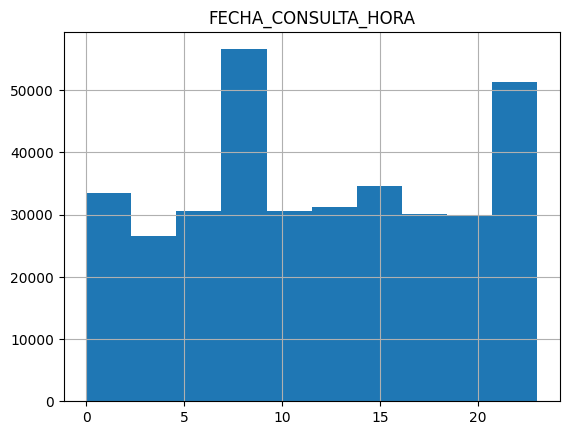

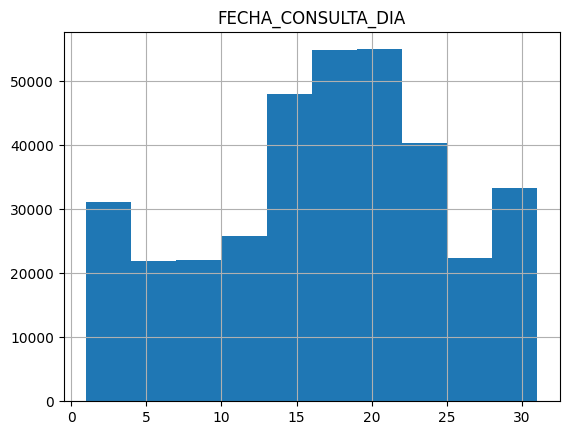

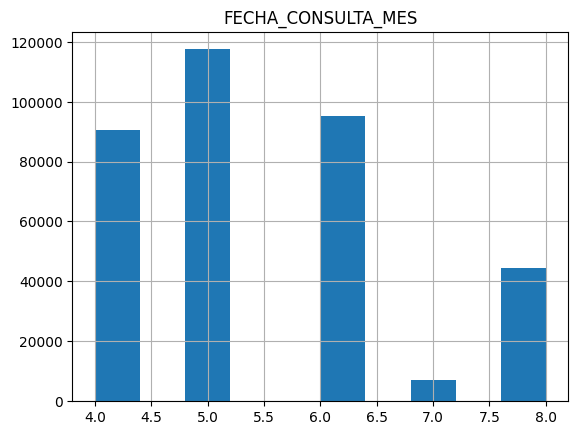

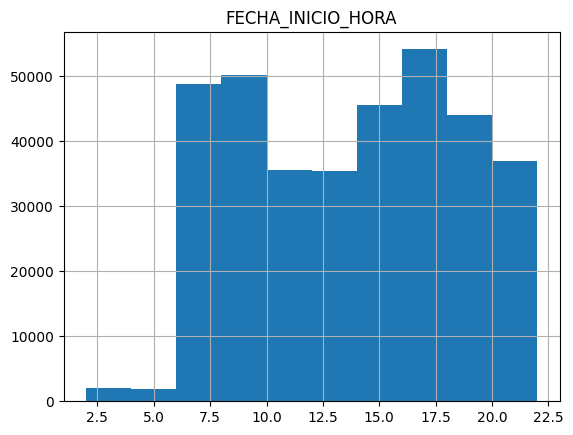

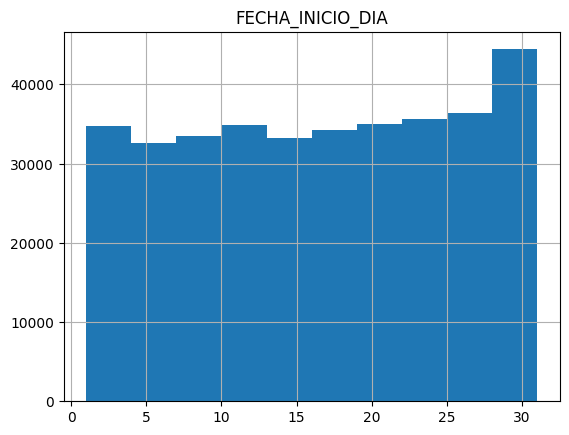

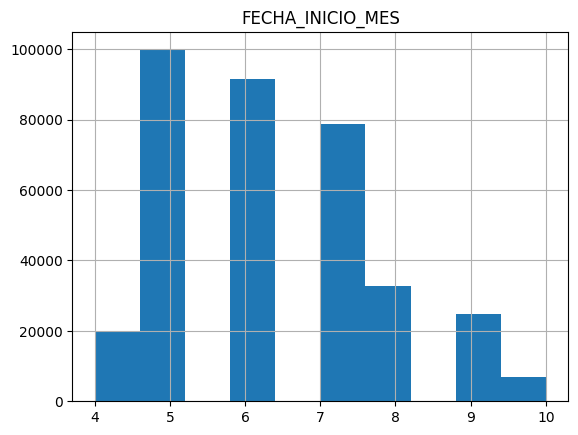

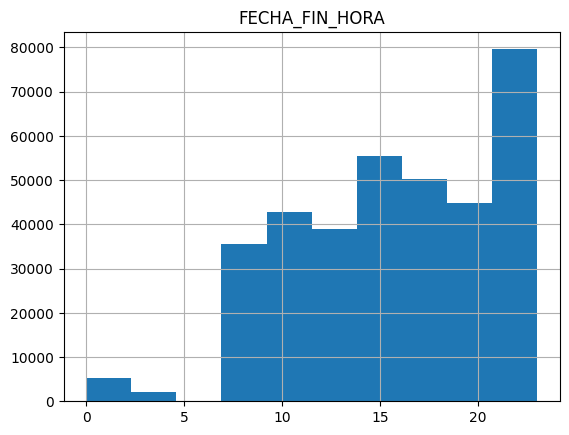

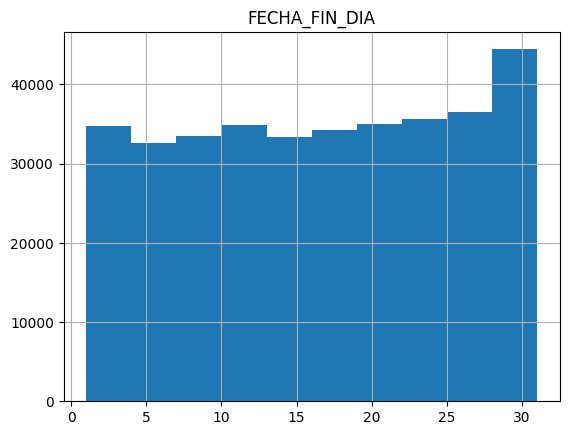

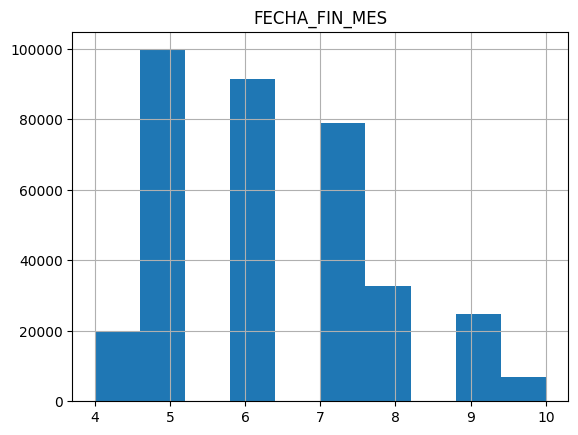

In [ ]:
for i in lnum:
    df_renfe_sin_duplicados3.hist(i)

In [ ]:
#Se eliminan los valores menores a 0 de la variable 'DIF_INI_BUS'
df_renfe_sin_duplicados3.drop(df_renfe_sin_duplicados3[df_renfe_sin_duplicados3['DIF_INI_BUS']<0].index, inplace=True)

<Axes: >

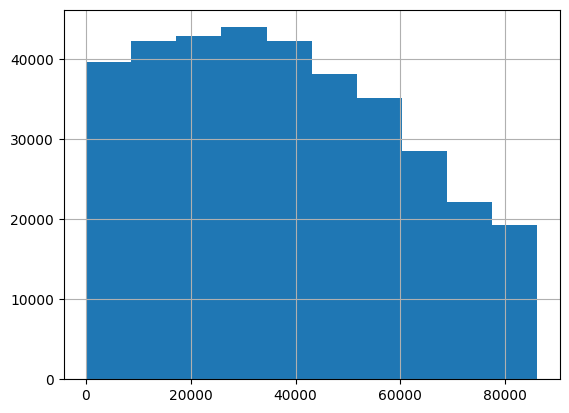

In [ ]:
df_renfe_sin_duplicados3['DIF_INI_BUS'].hist()

In [ ]:
#Valores outlayers de la variable 'FECHA_FIN_HORA'
df_renfe_sin_duplicados3[df_renfe_sin_duplicados3['FECHA_FIN_HORA']<5]

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
17,MADRID,PONFERRADA,TRENHOTEL,sin informacion,Turista,45.80,377.0,32943.183333,1,Sunday,26,5,22,Monday,17,6,4,Tuesday,18,6
62,MADRID,SEVILLA,AV City,sin informacion,Turista,49.15,165.0,2777.550000,23,Thursday,15,8,21,Saturday,17,8,0,Sunday,18,8
152,MADRID,PONFERRADA,TRENHOTEL,Flexible,Turista,45.80,377.0,21145.566667,5,Sunday,26,5,22,Sunday,9,6,4,Monday,10,6
189,BARCELONA,MADRID,sin informacion,Promo,Turista,58.15,167.0,53172.400000,23,Thursday,13,6,21,Saturday,20,7,0,Sunday,21,7
223,MADRID,SEVILLA,AV City,Promo,Turista,38.55,165.0,36379.950000,15,Tuesday,28,5,21,Saturday,22,6,0,Sunday,23,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383361,BARCELONA,MADRID,AVE,Promo,Turista,58.15,167.0,30235.250000,21,Monday,20,5,21,Monday,10,6,0,Tuesday,11,6
383368,MADRID,PONFERRADA,TRENHOTEL,sin informacion,Turista,45.80,377.0,33726.300000,12,Wednesday,5,6,22,Friday,28,6,4,Saturday,29,6
383384,MADRID,PONFERRADA,TRENHOTEL,Flexible,Turista,45.80,377.0,14707.250000,17,Friday,17,5,22,Monday,27,5,4,Tuesday,28,5
383411,BARCELONA,MADRID,AVE,sin informacion,Preferente,83.50,182.0,85031.133333,19,Thursday,16,5,21,Sunday,14,7,0,Monday,15,7


In [ ]:
#Porcentaje de los outlayers de la variable 'FECHA_FIN_HORA'
len(df_renfe_sin_duplicados3[df_renfe_sin_duplicados3['FECHA_FIN_HORA']<5]) *100 / len(df_renfe_sin_duplicados3)

2.0742037497176415

In [ ]:
# Se eliminan los valores outlayers de la variable 'FECHA_FIN_HORA'
df_renfe_sin_duplicados3.drop(df_renfe_sin_duplicados3[df_renfe_sin_duplicados3['FECHA_FIN_HORA']<5].index,inplace=True)

<Axes: >

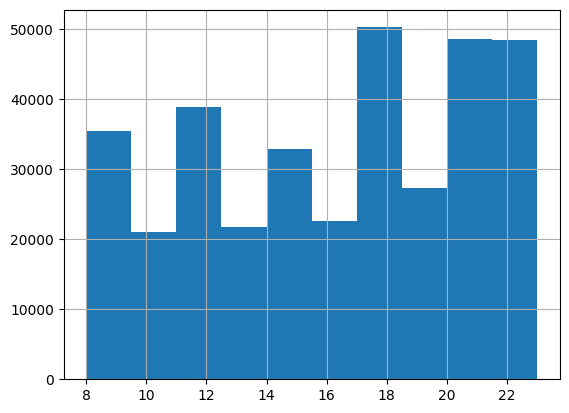

In [ ]:
df_renfe_sin_duplicados3['FECHA_FIN_HORA'].hist()

ANÁLISIS VARIABLES CATEGÓRICAS:


In [ ]:
lcat

['CIUDAD_ORIGEN',
 'CIUDAD_DESTINO',
 'TIPO_TREN',
 'TIPO_TARIFA',
 'CLASE',
 'FECHA_CONSULTA_NOMBREDIA',
 'FECHA_INICIO_NOMBREDIA',
 'FECHA_FIN_NOMBREDIA']

In [ ]:
for i in lcat:
    print(df_renfe_sin_duplicados3.value_counts(i))

CIUDAD_ORIGEN
MADRID        171665
BARCELONA      57126
SEVILLA        53510
VALENCIA       51804
PONFERRADA     12709
Name: count, dtype: int64
CIUDAD_DESTINO
MADRID        175149
BARCELONA      60526
VALENCIA       54533
SEVILLA        50328
PONFERRADA      6278
Name: count, dtype: int64
TIPO_TREN
AVE                224095
sin informacion     34311
ALVIA               19014
REGIONAL            16563
INTERCITY           16405
AV City              6841
MD-LD                6661
AVE-TGV              4450
R. EXPRES            4125
LD                   3647
AVE-LD               2856
AVE-MD               2349
LD-MD                2342
TRENHOTEL            1907
MD-AVE                760
MD                    488
Name: count, dtype: int64
TIPO_TARIFA
Promo                  221398
Flexible                62653
sin informacion         34354
Adulto ida              20696
Promo +                  7554
COD.PROMOCIONAL           141
Individual-Flexible         9
Mesa                        7
4x100

In [ ]:
df_renfe_sin_duplicados4=df_renfe_sin_duplicados3.copy()

In [ ]:
# Valores 'MD-LD' y 'LD-MD' se agrupan
df_renfe_sin_duplicados4['TIPO_TREN']=np.where(df_renfe_sin_duplicados4['TIPO_TREN']=='MD-LD', 'LD-MD',df_renfe_sin_duplicados4['TIPO_TREN'])

In [ ]:
# Valores 'MD-AVE' y 'AVE-MD' se agrupan
df_renfe_sin_duplicados4['TIPO_TREN']=np.where(df_renfe_sin_duplicados4['TIPO_TREN']=='MD-AVE', 'AVE-MD',df_renfe_sin_duplicados4['TIPO_TREN'])

In [ ]:
# Valores 'LD-AVE' y 'AVE-LD' se agrupan
df_renfe_sin_duplicados4['TIPO_TREN']=np.where(df_renfe_sin_duplicados4['TIPO_TREN']=='LD-AVE', 'AVE-LD',df_renfe_sin_duplicados4['TIPO_TREN'])

In [ ]:
df_renfe_sin_duplicados4['TIPO_TREN'].value_counts()

TIPO_TREN
AVE                224095
sin informacion     34311
ALVIA               19014
REGIONAL            16563
INTERCITY           16405
LD-MD                9003
AV City              6841
AVE-TGV              4450
R. EXPRES            4125
LD                   3647
AVE-MD               3109
AVE-LD               2856
TRENHOTEL            1907
MD                    488
Name: count, dtype: int64

In [ ]:
df_renfe_sin_duplicados5=df_renfe_sin_duplicados4.copy()

In [ ]:
otras_promociones = ['COD.PROMOCIONAL', 'Individual-Flexible', 'Mesa', '4x100', 'Grupos Ida']

In [ ]:
#Reemplazar 'COD.PROMOCIONAL', 'Individual-Flexible', 'Mesa', '4x100', 'Grupos Ida' por 'otras promociones'
df_renfe_sin_duplicados5['TIPO_TARIFA'] = np.where(df_renfe_sin_duplicados5['TIPO_TARIFA'] == 'COD.PROMOCIONAL', 'otras promociones', df_renfe_sin_duplicados5['TIPO_TARIFA'])

In [ ]:
df_renfe_sin_duplicados5['TIPO_TARIFA'] = np.where(df_renfe_sin_duplicados5['TIPO_TARIFA'] == 'Individual-Flexible', 'otras promociones', df_renfe_sin_duplicados5['TIPO_TARIFA'])

In [ ]:
df_renfe_sin_duplicados5['TIPO_TARIFA'] = np.where(df_renfe_sin_duplicados5['TIPO_TARIFA'] == 'Mesa', 'otras promociones', df_renfe_sin_duplicados5['TIPO_TARIFA'])

In [ ]:
df_renfe_sin_duplicados5['TIPO_TARIFA'] = np.where(df_renfe_sin_duplicados5['TIPO_TARIFA'] == '4x100', 'otras promociones', df_renfe_sin_duplicados5['TIPO_TARIFA'])

In [ ]:
df_renfe_sin_duplicados5['TIPO_TARIFA'] = np.where(df_renfe_sin_duplicados5['TIPO_TARIFA'] == 'Grupos Ida', 'otras promociones', df_renfe_sin_duplicados5['TIPO_TARIFA'])

In [ ]:
df_renfe_sin_duplicados5['TIPO_TARIFA'].value_counts()

TIPO_TARIFA
Promo                221398
Flexible              62653
sin informacion       34354
Adulto ida            20696
Promo +                7554
otras promociones       159
Name: count, dtype: int64

### PREGUNTA 9
##### Hola Juan, soy María (la CEO), ¡Que bien que ya tenemos el dataset limpio! me gustaría sacar algunos "insights" de la competencia, me puedes ayudar en lo siguiente: (Consejo: son varias preguntas se pueden distribuir las preguntas entre los participantes de cada grupo), en cada una de ellas poner el código y resultado.

##### A. ¿Cuál es la fecha mínima y máxima de consulta de las simulaciones?

R: Fecha mínima es 11.04.2019 y la máxima es 22.08.2019

In [ ]:
#df_renfe_sin_duplicados3['FECHA_CONSULTA'].sort_values()
#df_renfe_sin_duplicados3['FECHA_CONSULTA'].min()
#df_renfe_sin_duplicados3['FECHA_CONSULTA'].max()

In [ ]:
(df_renfe_sin_duplicados5.loc[:, ['FECHA_CONSULTA_DIA','FECHA_CONSULTA_MES']]).sort_values(by=['FECHA_CONSULTA_MES','FECHA_CONSULTA_DIA'])

,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES
113,11,4
314,11,4
640,11,4
1423,11,4
1922,11,4
...,...,...
383348,22,8
383386,22,8
383531,22,8
383536,22,8


##### B. ¿Cuál es el precio mímino, máximo y medio del billete?

R: El precio mínimo es 12.85, el precio máximo 342.80 y el precio medio del billete es 61.55 euros. Nota: Hay dos billetes con valor 0.

In [ ]:
# R: El precio mínimo es 12.85, el precio máximo 342.80 y el precio medio del billete es 61.55 euros. Nota: Hay dos billetes con valor 0.
df_renfe_sin_duplicados5['PRECIO'].sort_values()
#df_renfe_sin_duplicados5['PRECIO'].min()
#df_renfe_sin_duplicados5['PRECIO'].max()

121961      0.00
136925      0.00
37688      12.85
80081      12.85
335334     12.85
           ...  
121685    214.20
253028    290.40
376642    290.40
202466    290.40
16565     342.80
Name: PRECIO, Length: 346814, dtype: float64

NOTA: Al hacer este ejercicio nos dimos cuenta que aparecen pasajes con valor 0, por lo que decidimos eliminarlos.

In [ ]:
df_renfe_sin_duplicados5.drop(df_renfe_sin_duplicados5[df_renfe_sin_duplicados5['PRECIO']<1].index,inplace=True)

In [ ]:
df_renfe_sin_duplicados5['PRECIO'].sort_values()

377612     12.85
250942     12.85
123928     12.85
42103      12.85
175194     12.85
           ...  
121685    214.20
253028    290.40
376642    290.40
202466    290.40
16565     342.80
Name: PRECIO, Length: 346812, dtype: float64

In [ ]:
df_renfe_sin_duplicados5['PRECIO'].mean()
#df_renfe_sin_duplicados5.description()

61.55330634464784

##### C. ¿Cuántas rutas se simularon en el mes de agosto de 2019?

R: Se simularon 8 rutas:

- MADRID BARCELONA  :   60526
- BARCELONA MADRID   :  57124
- MADRID VALENCIA    :  54533
- SEVILLA MADRID      : 53510
- VALENCIA MADRID     : 51804
- MADRID SEVILLA      : 50328
- PONFERRADA MADRID   : 12709
- MADRID PONFERRADA    : 6278

In [ ]:
Se simularon 8 rutas:

MADRID BARCELONA : 60526
BARCELONA MADRID : 57124
MADRID VALENCIA : 54533
SEVILLA MADRID : 53510
VALENCIA MADRID : 51804
MADRID SEVILLA : 50328
PONFERRADA MADRID : 12709
MADRID PONFERRADA : 6278

df_renfe_sin_duplicados5['RUTA'] = df_renfe_sin_duplicados5.CIUDAD_ORIGEN.str.cat(df_renfe_sin_duplicados5.CIUDAD_DESTINO, sep=' ')
df_renfe_sin_duplicados5['RUTA'].value_counts()

In [ ]:
#Se crea una nueva variable llamada 'RUTA'
df_renfe_sin_duplicados5['RUTA'] = df_renfe_sin_duplicados5.CIUDAD_ORIGEN.str.cat(df_renfe_sin_duplicados5.CIUDAD_DESTINO, sep=' ')

In [ ]:
df_renfe_sin_duplicados5['RUTA'].value_counts()
#df_renfe_sin_duplicados5['RUTA'].unique()

RUTA
MADRID BARCELONA     60526
BARCELONA MADRID     57124
MADRID VALENCIA      54533
SEVILLA MADRID       53510
VALENCIA MADRID      51804
MADRID SEVILLA       50328
PONFERRADA MADRID    12709
MADRID PONFERRADA     6278
Name: count, dtype: int64

##### D. ¿Cuántas rutas se simularon que la duración del viaje sea superior a 4 horas?
Las 8 rutas disponibles pueden hacerse en una duración mayor a 4 horas.

- MADRID VALENCIA     :     14590
- VALENCIA MADRID      :     13142
- PONFERRADA MADRID     :    12709
- MADRID PONFERRADA      :   4564
- BARCELONA MADRID        :  2629
- SEVILLA MADRID           : 2123
- MADRID BARCELONA         : 1959
- MADRID SEVILLA           : 1522


In [ ]:
#df_renfe_sin_duplicados5.loc[:,['TIEMPO_VIAJE','RUTA']]
#(df_renfe_sin_duplicados5[df_renfe_sin_duplicados5['TIEMPO_VIAJE']<240])['RUTA'].unique()
(df_renfe_sin_duplicados5[df_renfe_sin_duplicados5['TIEMPO_VIAJE']>240])['RUTA'].value_counts()

RUTA
MADRID VALENCIA      14590
VALENCIA MADRID      13142
PONFERRADA MADRID    12709
MADRID PONFERRADA     4564
BARCELONA MADRID      2629
SEVILLA MADRID        2123
MADRID BARCELONA      1959
MADRID SEVILLA        1522
Name: count, dtype: int64

##### FINAL PARTE 1: Vamos grabando lo hecho, puedes subir el fichero desarrollado? además crea un "pickle" para tener el dataset en nuestro drive y así no volver a ejecutar todo de nuevo.

In [ ]:
df_renfe_clean=df_renfe_sin_duplicados5.copy()

In [ ]:
df_renfe_clean.to_pickle('df_renfe_clean.pkl')